In [1]:
import pandas as pd
import altair as alt
import numpy as np
from calculate_initial_dGs_and_fluxes import calculate_dG, get_robust_fluxes

In [2]:
temperature = 298  # in K
gas_constant = 8.314 * 10**-3  # in kJ K^-1 mol^-1
file_in = '/home/mrama/GRASP_test/GRASP/input_test/HMP1489_r1_t0_test_gibbs.xlsx'
rxn_order = ['DDC', 'DDC_tryptm', 'TPH',  'AANAT', 'AANAT_tryptm',  'ASMT']

In [3]:

ma_df, dG_Q_df, dG_df = calculate_dG(file_in, gas_constant, temperature, rxn_order)
ma_df['rxn'] = ma_df.index
dG_Q_df['rxn'] = dG_Q_df.index
dG_df['rxn'] = dG_df.index


flux_df = get_robust_fluxes(file_in, rxn_order)
flux_df['rxn'] = flux_df.index
flux_df['flux_min'] = flux_df['flux'] - flux_df['flux_std']
flux_df['flux_max'] = flux_df['flux'] + flux_df['flux_std']


    

In [4]:
def plot_dG_and_flux(dG_df, flux_df):
    threshold_df = pd.DataFrame([{"ThresholdValue": 0, "Threshold": "hazardous"}])
    
    rect_dG = alt.Chart(dG_df).mark_rect().encode(
        y ='rxn:N',
        x='∆G_min',
        x2='∆G_max'
    ).properties(
        height=400,
        width=600
    )

    point_dG = alt.Chart(dG_df).mark_point(size=100, color='red', filled=True).encode(
        y ='rxn:N',
        x='∆G_mean',
        tooltip='∆G_mean'
    ).interactive()


    rule_dG = alt.Chart(threshold_df).mark_rule().encode(
        x='ThresholdValue:Q'
    )


    rect_flux = alt.Chart(flux_df).mark_rect().encode(
        y ='rxn:N',
        x='flux_min',
        x2='flux_max'
    ).properties(
        height=400,
        width=600
    )

    point_flux = alt.Chart(flux_df).mark_point(size=100, color='red', filled=True).encode(
        y ='rxn:N',
        x='flux',
        tooltip='flux'
    ).interactive()


    rule_flux = alt.Chart(threshold_df).mark_rule().encode(
        x='ThresholdValue:Q'
    )

    return alt.hconcat(rect_dG + point_dG + rule_dG, rect_flux + point_flux + rule_flux)


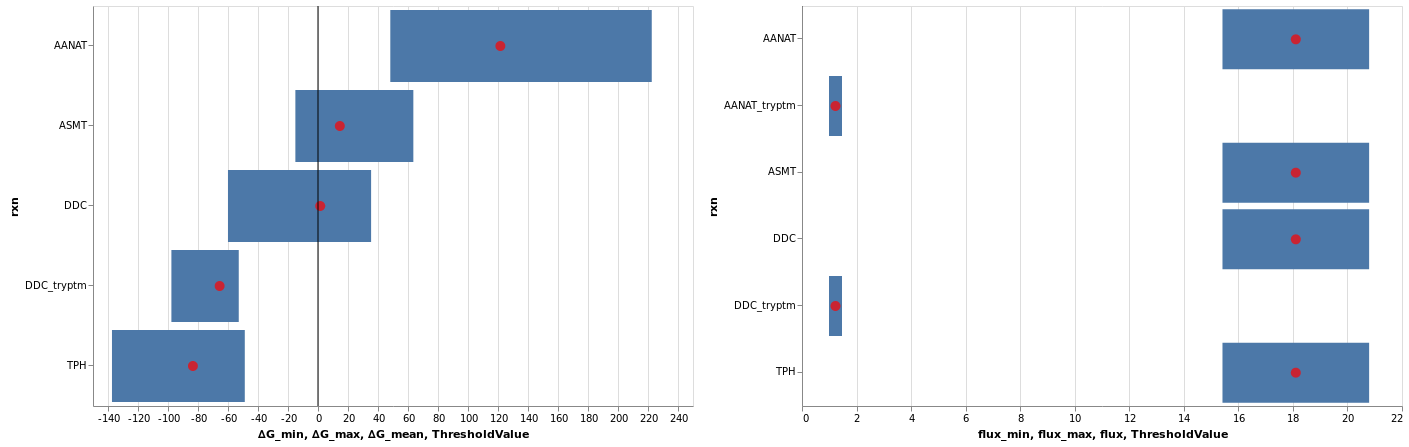

In [5]:
plot_dG_and_flux(dG_df, flux_df)